<a href="https://colab.research.google.com/github/KB1994/Qlearning_SARSALearning/blob/main/Q_learning_VS_SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q-values (Q-learning):
 [[ 79.09989681  88.99999989  89.99998122 100.        ]
 [ 39.29999439  88.99999329   0.           0.        ]
 [ 44.25        88.9999999    0.           0.        ]
 [100.          99.99389648  79.09071955  88.97827148]
 [ -0.5         99.99999925   0.           0.        ]
 [ -0.5        100.           0.          39.2149494 ]
 [100.          99.90233775  88.97011245  79.094687  ]
 [100.         100.          89.          89.        ]]
Q-values (SARSA):
 [[76.61337571 72.41723296 65.50266564 87.0375062 ]
 [-0.975      -0.5        87.63975417 40.98179538]
 [-0.5        59.6581912  36.49787368 89.7164166 ]
 [87.52053784 81.83284251 78.21177484 77.9959988 ]
 [37.27653371  0.         67.29131767  0.        ]
 [77.29606853 86.8557181  20.24589225 38.71689843]
 [82.57715465 84.40284789 78.46619114 73.49097033]
 [86.23716244 83.95348835 74.70089351 77.41186656]]


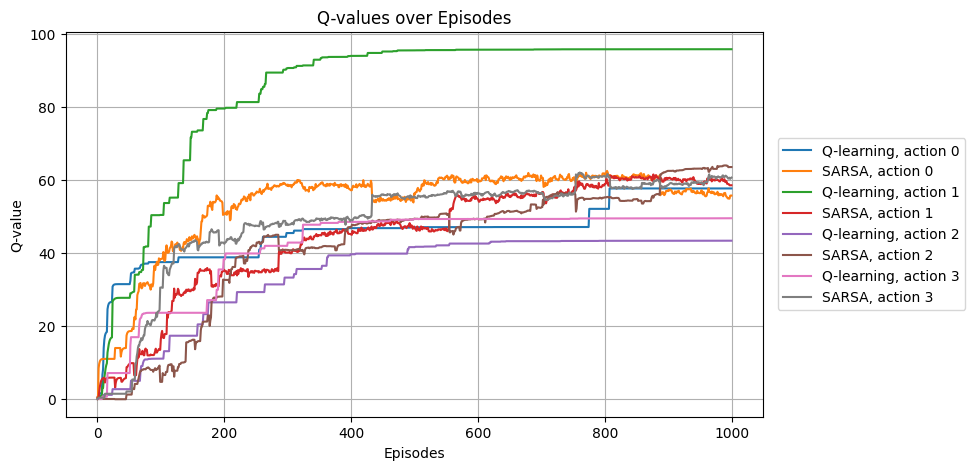

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
num_states = 8
num_actions = 4
rewards = np.array([-1, -1, -1, -1, 0, -1, -1, 10])  # Rewards for each state
"""transitions = np.array([[1, 3, 4, -1],  # From state 0: go to states 1, 3, 4 (action 0, 1, 2), invalid action -1
                        [2, 5, -1, 0],  # From state 1: go to states 2, 5, 0 (action 0, 1, 3), invalid action -1
                        [3, 6, 1, -1],  # From state 2: go to states 3, 6, 1 (action 0, 1, 2), invalid action -1
                        [7, -1, 2, 0],  # From state 3: go to states 7, 2, 0 (action 0, 2, 3), invalid action -1
                        [5, -1, -1, 0],  # From state 4: go to states 5, 0 (action 0, 3), invalid action -1
                        [6, -1, 4, 1],  # From state 5: go to states 6, 4, 1 (action 0, 2, 1), invalid action -1
                        [7, -1, 5, 2],  # From state 6: go to states 7, 5, 2 (action 0, 2, 3), invalid action -1
                        [-1, -1, 6, 3]])  # From state 7: go to state 6 (action 2), invalid actions -1 """

transitions = np.array([[1, 3, 4, -1],  # From state 0: go to states 1, 3, 4 (action 0, 1, 2), invalid action -1
                        [2, 5, -1, 0],  # From state 1: go to states 2, 5, 0 (action 0, 1, 3), invalid action -1
                        [3, 6, 1, -1],  # From state 2: go to states 3, 6, 1 (action 0, 1, 2), invalid action -1
                        [7, -1, 2, 0],  # From state 3: go to states 7, 2, 0 (action 0, 2, 3), invalid action -1
                        [5, -1, -1, 0],  # From state 4: go to states 5, 0 (action 0, 3), invalid action -1
                        [6, -1, 4, 1],  # From state 5: go to states 6, 4, 1 (action 0, 2, 1), invalid action -1
                        [7, -1, 5, 2],  # From state 6: go to states 7, 5, 2 (action 0, 2, 3), invalid action -1
                        [-1, -1, 6, 3]])  # From state 7: go to state 6 (action 2), invalid actions -1

# Q-learning algorithm
def q_learning(num_episodes, alpha, gamma, epsilon):
    Q = np.zeros((num_states, num_actions))

    q_values = []

    for _ in range(num_episodes):
        state = 0  # Start from state 0

        while state != 7:  # Repeat until goal state is reached
            # Choose action based on epsilon-greedy policy
            if np.random.uniform() < epsilon:
                action = np.random.randint(num_actions)
            else:
                action = np.argmax(Q[state])

            # Perform action and observe next state and reward
            next_state = transitions[state, action]
            reward = rewards[next_state]

            # Update Q-value
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

            state = next_state  # Transition to the next state

        q_values.append(Q.copy())

    return Q, q_values

# SARSA algorithm
def sarsa(num_episodes, alpha, gamma, epsilon):
    Q = np.zeros((num_states, num_actions))
    q_values = []
    for _ in range(num_episodes):
        state = 0  # Start from state 0
        action = None

        # Choose initial action based on epsilon-greedy policy
        if np.random.uniform() < epsilon:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(Q[state])

        while state != 7:  # Repeat until goal state is reached
            # Perform action and observe next state and reward
            next_state = transitions[state, action]
            reward = rewards[next_state]

            # Choose next action based on epsilon-greedy policy
            if np.random.uniform() < epsilon:
                next_action = np.random.randint(num_actions)
            else:
                next_action = np.argmax(Q[next_state])

            # Update Q-value
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state = next_state
            action = next_action  # Transition to the next state-action pair
        q_values.append(Q.copy())

    return Q, q_values

# Main program
num_episodes = 1000
alpha = 0.5
gamma = 0.9
epsilon = 0.1

q_learning_Q, q_learning_q_values = q_learning(num_episodes, alpha, gamma, epsilon)
sarsa_Q, sarsa_q_values = sarsa(num_episodes, alpha, gamma, epsilon)

# Print the learned Q-values for Q-learning and SARSA
print("Q-values (Q-learning):\n", q_learning_Q)
print("Q-values (SARSA):\n", sarsa_Q)

#mean_Qlearning_Q = np.mean(q_learning_q_values, axis=0 )
#print('Q-values mean (Q-learning):\n ', mean_Qlearning_Q)

#mean_sarsa_Q = np.mean(sarsa_q_values, axis=0 )
#print('Q-values mean (Q-learning):\n ', mean_sarsa_Q)


plt.figure(figsize=(9, 5))
for i in range(num_actions):
    plt.plot(range(num_episodes), [np.mean(q_values[:, i],  axis=0)for q_values in q_learning_q_values], label=f'Q-learning, action {i}')
    plt.plot(range(num_episodes), [np.mean(q_values[:, i] , axis=0) for q_values in sarsa_q_values], label=f'SARSA, action {i}')

plt.xlabel('Episodes')
plt.ylabel('Q-value')
plt.title('Q-values over Episodes')
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.grid(True)
plt.show()